# Singapore employment data
(The right way)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [9]:
raw=pd.read_csv('singapore_lfpr.csv', names=['in','percentage'], header=0)

In [14]:
newdf=pd.Series(raw['percentage'].values, index=pd.date_range(start='1980', end='2008', freq='A-DEC'))

In [15]:
newdf

1980-12-31    70.199997
1981-12-31    71.099998
1982-12-31    71.699997
1983-12-31    72.300003
1984-12-31    73.099998
1985-12-31    72.900002
1986-12-31    74.400002
1987-12-31    75.400002
1988-12-31    76.000000
1989-12-31    76.900002
1990-12-31    77.400002
1991-12-31    78.199997
1992-12-31    78.900002
1993-12-31    78.699997
1994-12-31    79.000000
1995-12-31    78.000000
1996-12-31    80.000000
1997-12-31    79.800003
1998-12-31    80.300003
1999-12-31    80.500000
2000-12-31    80.699997
2001-12-31    81.099998
2002-12-31    81.500000
2003-12-31    81.900002
2004-12-31    82.300003
2005-12-31    82.699997
2006-12-31    83.199997
2007-12-31    83.500000
Freq: A-DEC, dtype: float64

Text(0,0.5,'Percentage')

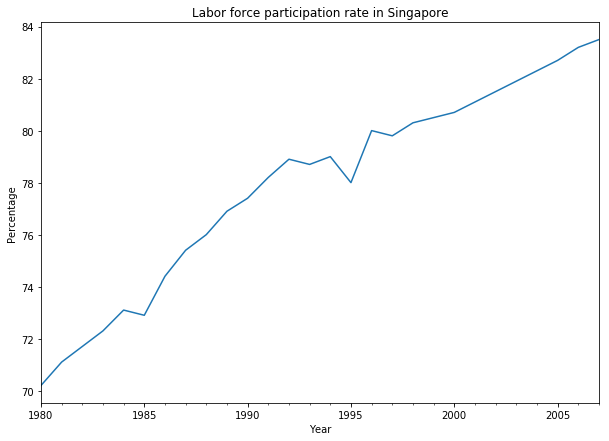

In [19]:
plt.figure(figsize=(10,7))
fig=newdf.plot()
fig.set_title("Labor force participation rate in Singapore")
fig.set_xlabel('Year')
fig.set_ylabel('Percentage')

In [20]:
#adfuller test
test_adf=adfuller(newdf,autolag='AIC')


In [26]:
pd.Series(test_adf[0:4], index=['adf', 'pvalue', 'usedlag', 'nobs'])

adf        -1.780773
pvalue      0.390048
usedlag     0.000000
nobs       27.000000
dtype: float64

In [ ]:
#Not stationary

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


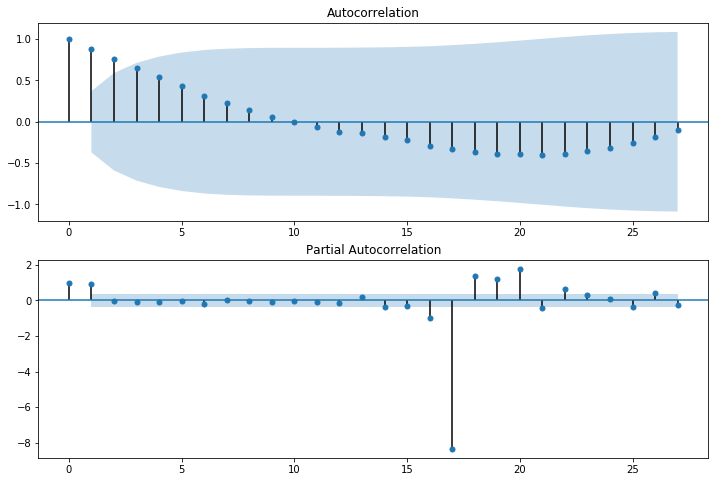

In [31]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(newdf.values, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(newdf.values, ax=ax2)


In [32]:
diff_1=newdf-newdf.shift(1)

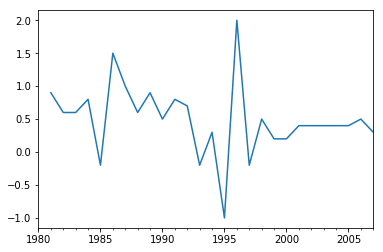

In [33]:
diff_1.plot()

In [35]:
test_adf2=adfuller(diff_1.dropna(),autolag='AIC')


In [36]:
pd.Series(test_adf2[0:4], index=['adf', 'pvalue', 'usedlag', 'nobs'])

adf       -7.334932e+00
pvalue     1.102886e-10
usedlag    0.000000e+00
nobs       2.600000e+01
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


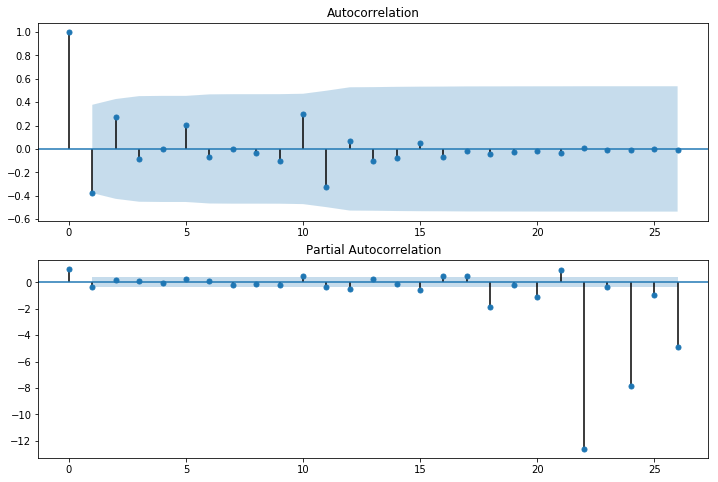

In [38]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(diff_1.dropna().values,lags=20 ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(diff_1.dropna().values,lags=20 ax=ax2)

In [44]:
model=ARIMA(diff_1.dropna().values,order=(1,0,0))

In [45]:
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                     ARMA(1, 0)   Log Likelihood                 -20.049
Method:                       css-mle   S.D. of innovations              0.507
Date:                Wed, 30 Sep 2020   AIC                             46.098
Time:                        16:14:26   BIC                             49.985
Sample:                             0   HQIC                            47.254
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4904      0.072      6.811      0.000       0.349       0.632
ar.L1.y       -0.3690      0.176     -2.094      0.047      -0.714      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7097           +0.0000j            2.7097            0.5000
-----------------------------------------------------------------------------
"""

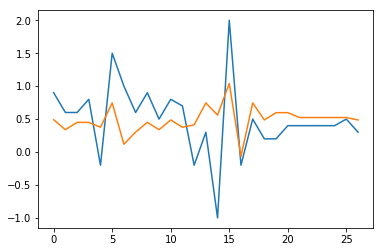

In [52]:
plt.plot(diff_1.dropna().values)
plt.plot(results.fittedvalues)

In [53]:
residuals=results.resid

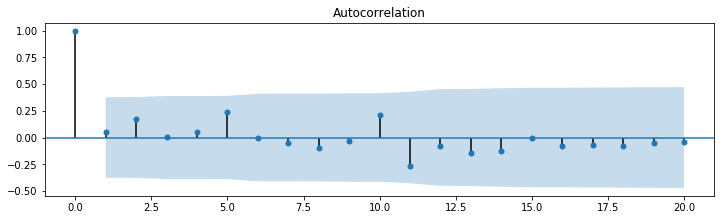

In [62]:
fig=plt.figure(figsize=(12,7))
ax1=fig.add_subplot(211)
fig=plot_acf(residuals, lags=20, ax=ax1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


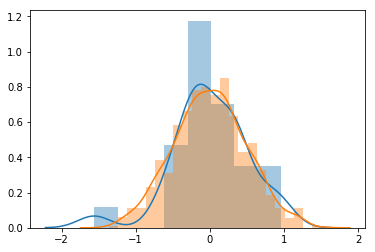

In [67]:
sns.distplot(residuals)
sns.distplot(np.random.normal(loc=residuals.mean(), scale=residuals.std(), size=1000))

------- Test other models ----------

In [70]:
model2=ARIMA(diff_1.dropna().values,order=(2,0,0))

In [71]:
results2=model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [72]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                     ARMA(2, 0)   Log Likelihood                 -19.740
Method:                       css-mle   S.D. of innovations              0.501
Date:                Wed, 30 Sep 2020   AIC                             47.479
Time:                        16:28:09   BIC                             52.662
Sample:                             0   HQIC                            49.020
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4920      0.083      5.925      0.000       0.329       0.655
ar.L1.y       -0.3099      0.188     -1.644      0.113      -0.679       0.060
ar.L2.y        0.1478      0.187      0.793      0.436      -0.218       0.513
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7561           +0.0000j            1.7561            0.5000
AR.2            3.8525           +0.0000j            3.8525            0.0000
-----------------------------------------------------------------------------
"""

The best fitting ARIMA model is ARIMA(1,1,0)